In [143]:
import numpy as np
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt
from functools import partial
rcParams = {'font.size': 24 , 'font.weight': 'normal', 'font.family': 'sans-serif',
            'axes.unicode_minus':False, 'axes.labelweight':'normal'}

plt.rcParams.update(rcParams)
Plots_Dir = '../../Plots/Iterative_Clustering/'

def Get_Entropy(labels):
    counts_dict = {}
    for label in labels:
        try:
            counts_dict[label] += label
        except KeyError:
            counts_dict[label] = label
    probs = []
    for c in counts_dict:
        probs.append(counts_dict[c]/np.sum(list(counts_dict.values())))
    n_classes = len(counts_dict)
    return - np.sum(probs * np.log(probs)) / np.log(n_classes)

def Get_NG_Statistics(vector, clust_thresh=0): 
    x = np.arange(0, 100, 0.5)
    vector = np.sort(vector)[::-1]
    vector = vector[vector > clust_thresh]
    temp = np.cumsum(vector)
    NG, cum = [], []
    norm = np.sum(vector)
    for i in x:
        try:
            NG.append(round(vector[np.where(temp <= norm*i/100)[0][-1]]/1773145.0*100,2))
            cum.append(temp[np.where(temp <= norm*i/100)[0][-1]])
        except IndexError:
            pass
    return cum, NG


1347906


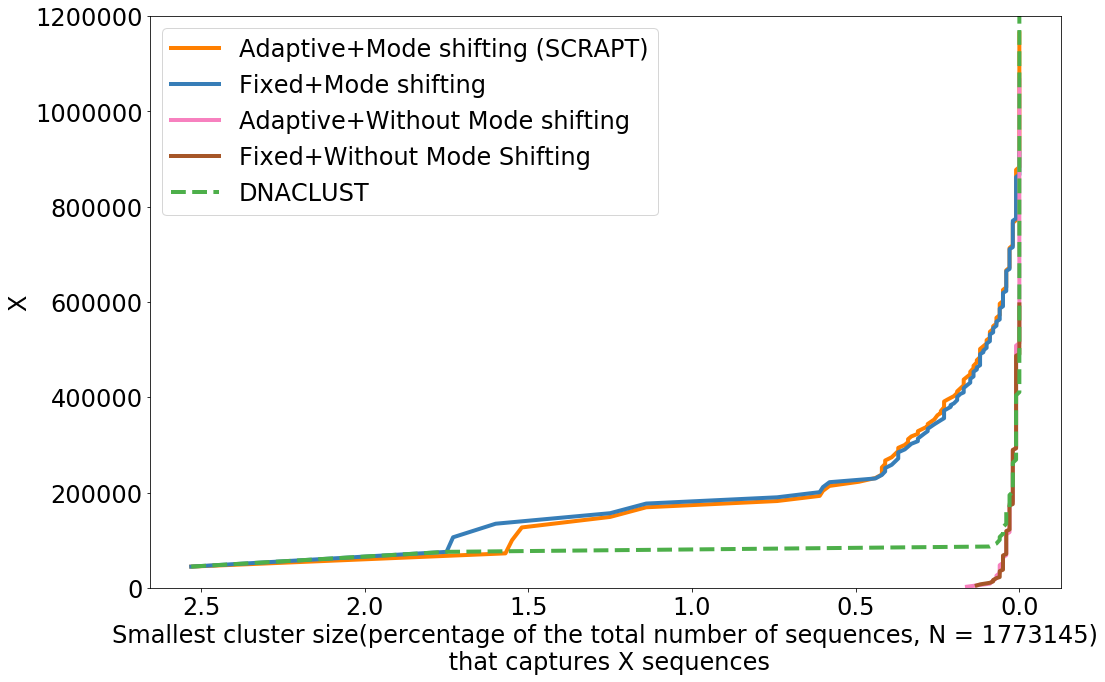

In [144]:
alpha = '0.1'
filedir = '/Users/harihara/Mount/Iterative_Clustering/Experiments/'
df_ms_adap = pd.read_csv(filedir + 'With_Modeshifting/Adaptive/alpha_'+alpha+'/Cluster_Summary.txt',sep = '\t')
df_w_ms_adap = pd.read_csv(filedir + 'No_Modeshifting/Adaptive/alpha_'+alpha+'/Cluster_Summary.txt',sep = '\t')
df_ms_fix = pd.read_csv(filedir + 'With_Modeshifting/Fix_Alpha/alpha_'+alpha+'/Cluster_Summary.txt',sep = '\t')
df_w_ms_fix = pd.read_csv(filedir + 'No_Modeshifting/Fix_Alpha/alpha_'+alpha+'/Cluster_Summary.txt',sep = '\t')
dnaclust_counts = open('dnaclust_op','r').readlines()
dnaclust_size = []
for d in dnaclust_counts:
    d = d.rstrip()
    if len(d.split()) >= 2:
        dnaclust_size.append(len(d.split()))

print(np.sum(dnaclust_size))

fig,ax = plt.subplots(1,1,figsize = (16,10))
colors = colors = ['#ff7f00','#377eb8','#f781bf', '#a65628', '#4daf4a']
labels = ['Adaptive+Mode shifting (SCRAPT)', 'Fixed+Mode shifting', 
          'Adaptive+Without Mode shifting', 'Fixed+Without Mode Shifting', 'DNACLUST', 'DNACLUST+Modeshift']
markers = ['o','<','>','^','v']
ctr = 0
for df in [df_ms_adap, df_ms_fix, df_w_ms_adap, df_w_ms_fix, dnaclust_size]:
    if ctr == 4:
        x,y=Get_NG_Statistics(df)
        ax.plot(y, x, color = colors[ctr], label = labels[ctr], linewidth = 4, linestyle = '--')
    else:
        x,y=Get_NG_Statistics(df['Size'].tolist())
        ax.plot(y, x, color = colors[ctr], label = labels[ctr], linewidth = 4)
    ctr += 1

ax.set_xlim(ax.get_xlim()[::-1])
ax.legend()
ax.set_ylim(0,1200000)
ax.set_ylabel('X')
ax.set_xlabel('Smallest cluster size(percentage of the total number of sequences, N = 1773145)\n that captures X sequences')
fig.tight_layout()

fig.savefig(Plots_Dir+'Fragmentation_'+alpha+'.pdf')


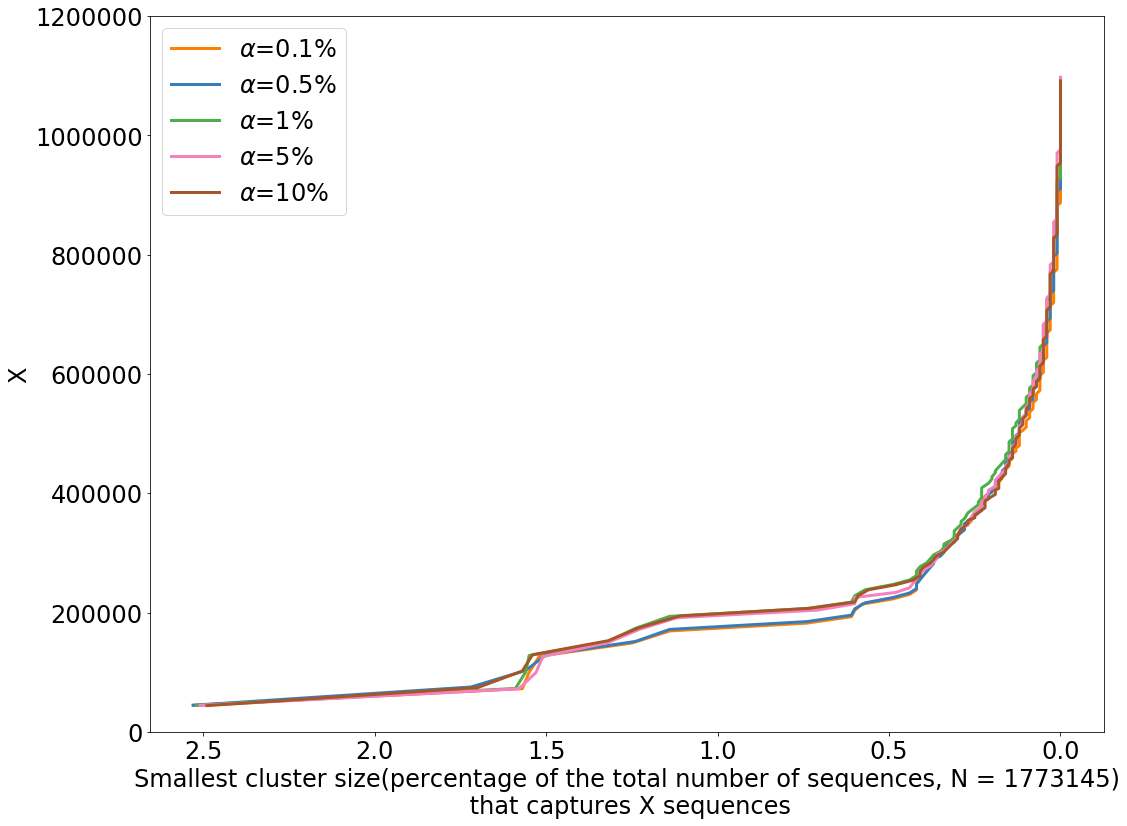

In [145]:
filedir = '/Users/harihara/Mount/Iterative_Clustering/Experiments/'
df_alpha_01_ms_adap = pd.read_csv(filedir+'With_Modeshifting/Adaptive/alpha_0.1/Cluster_Summary.txt',sep = '\t')
df_alpha_05_ms_adap = pd.read_csv(filedir+'With_Modeshifting/Adaptive/alpha_0.5/Cluster_Summary.txt',sep = '\t')
df_alpha_1_ms_adap = pd.read_csv(filedir+'With_Modeshifting/Adaptive/alpha_1.0/Cluster_Summary.txt',sep = '\t')
df_alpha_5_ms_adap = pd.read_csv(filedir+'With_Modeshifting/Adaptive/alpha_5.0/Cluster_Summary.txt',sep = '\t')
df_alpha_10_ms_adap = pd.read_csv(filedir+'With_Modeshifting/Adaptive/alpha_10.0/Cluster_Summary.txt',sep = '\t')
fig,ax = plt.subplots(1,1,figsize = (16,12))
colors = ['#ff7f00','#377eb8','#4daf4a','#f781bf', '#a65628']
labels = [r'$\alpha$=0.1%',r'$\alpha$=0.5%',r'$\alpha$=1%',r'$\alpha$=5%',r'$\alpha$=10%']
ctr = 0
for df in [df_alpha_01_ms_adap, df_alpha_05_ms_adap, df_alpha_1_ms_adap, df_alpha_5_ms_adap, df_alpha_10_ms_adap]:
    x,y=Get_NG_Statistics(df['Size'], 20)
    ax.plot(y, x, color = colors[ctr], label = labels[ctr], linewidth = 3)
    ctr += 1

ax.legend()
ax.grid()
#ax.set_xlabel('X')
#ax.set_ylabel('Smallest cluster size that captures X sequences')
fig.tight_layout()
ax.grid()
#ax.semilogx()
ax.set_xlim(ax.get_xlim()[::-1])
ax.legend()
ax.set_ylim(0,1200000)
#ax.set_title('Initial Sampling Rate, '+r'$\alpha$'+'='+alpha+'%')
ax.set_ylabel('X')
ax.set_xlabel('Smallest cluster size(percentage of the total number of sequences, N = 1773145)\n that captures X sequences')
fig.tight_layout()
fig.savefig(Plots_Dir+'Comparing_Fragmentation_for_different_alpha_SCRAPT.pdf')


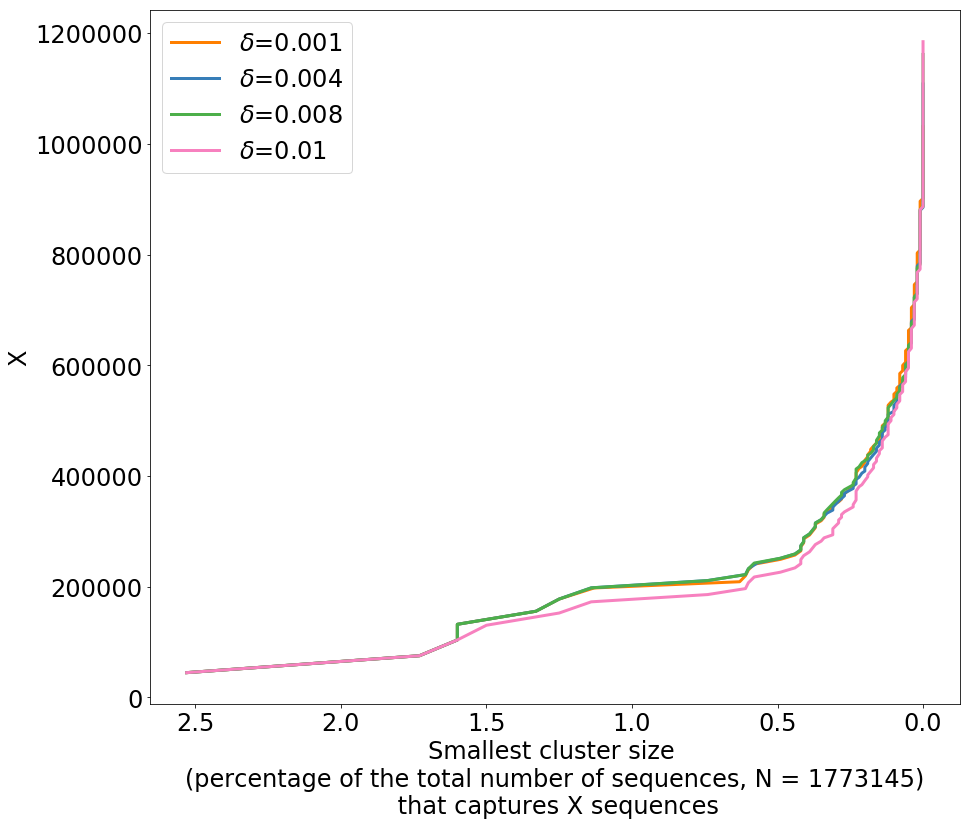

In [105]:
filedir = '/Users/harihara/Mount/Iterative_Clustering/Experiments/Vary_Delta/alpha_0.1/'
df_delta_001_ms_adap = pd.read_csv(filedir + 'delta_0.001/Cluster_Summary.txt',sep = '\t')
df_delta_004_ms_adap = pd.read_csv(filedir + 'delta_0.004/Cluster_Summary.txt',sep = '\t')
df_delta_008_ms_adap = pd.read_csv(filedir + 'delta_0.008/Cluster_Summary.txt',sep = '\t')
df_delta_01_ms_adap = pd.read_csv(filedir + 'delta_0.01/Cluster_Summary.txt',sep = '\t')
fig,ax = plt.subplots(1,1,figsize = (14,12))
colors = ['#ff7f00','#377eb8','#4daf4a','#f781bf', '#a65628']
labels = [r'$\delta$=0.001',r'$\delta$=0.004',r'$\delta$=0.008',r'$\delta$=0.01']
ctr = 0

for df in [df_delta_001_ms_adap, df_delta_004_ms_adap, df_delta_008_ms_adap, df_delta_01_ms_adap]:
    x,y=Get_NG_Statistics(df['Size'])
    ax.plot(y, x, color = colors[ctr], label = labels[ctr], linewidth = 3)
    ctr += 1

ax.set_xlim(ax.get_xlim()[::-1])
ax.legend()
ax.set_ylabel('X')
ax.set_xlabel('Smallest cluster size \n(percentage of the total number of sequences, N = 1773145)\n that captures X sequences')
fig.tight_layout()

fig.savefig(Plots_Dir+'Delta_Fragmentation.pdf')


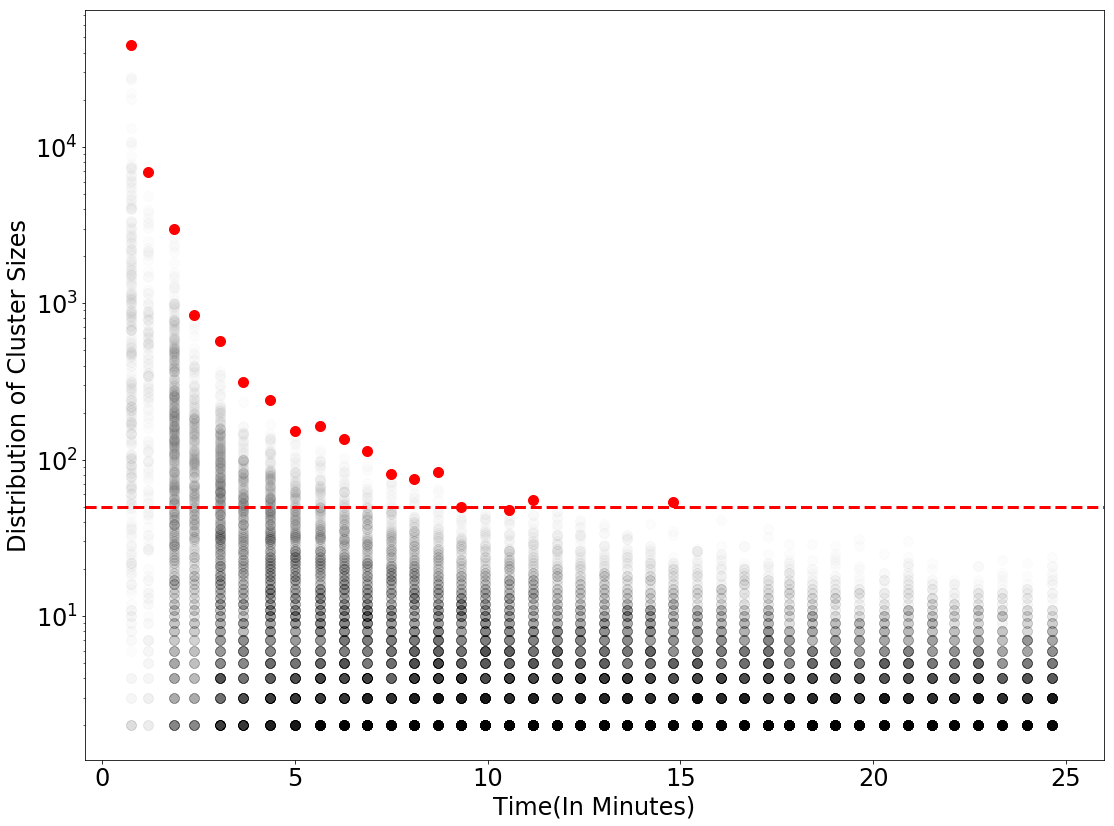

In [184]:
df_summary = pd.read_csv('Time_MS_SCRAPT.txt')
df_summary = df_summary.set_index('Sample_Rate')
df_summary = df_summary.loc[0.1].set_index('Iteration')
fig,ax = plt.subplots(1,1,figsize = (16,12))
ctr = 0
temp = df_alpha_01_ms_adap.sort_values(by = ['Iteration', 'Size'])
temp = temp[temp['Size'] > 1]
for j in range(0, temp['Iteration'].max()+1):
    time = df_summary.loc[j]['Cumulative_Time']
    sizes = np.array(temp[temp['Iteration'] == j]['Size'].tolist())
    #r = np.percentile(sizes, 20)
    try:
        r = sizes[sizes >=48][-1]
    except IndexError:
        r = np.nan
    #print(r)
    ax.scatter([time]*len(sizes), sizes, alpha=0.01,  color = 'black', s = 100)
    ax.scatter(time, r, color = 'red', s = 100)
    #print(j, max(sizes))
ax.set_yscale('log')
ax.set_xlabel('Time(In Minutes)')
ax.set_ylabel('Distribution of Cluster Sizes')
ax.axhline(50, linestyle = '--', linewidth=3, color = 'red')
fig.tight_layout()
fig.savefig(Plots_Dir+'Important_Clusters.pdf')